In [8]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [9]:
df=pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

In [10]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
df.describe

<bound method NDFrame.describe of       RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumO

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [13]:
df.duplicated().sum()

0

In [14]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [16]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [17]:
df.drop(columns=['RowNumber','Surname','CustomerId'],inplace=True)

In [18]:
df=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)


In [19]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [20]:
from sklearn.model_selection import train_test_split

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [21]:
x=df.drop(columns=['Exited'])
y=df['Exited']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [22]:
x_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
2694,628,29,3,113146.98,2,0,1,124749.08,1,0,1
5140,626,29,4,105767.28,2,0,0,41104.82,0,0,0
2568,612,47,6,130024.87,1,1,1,45750.21,1,0,0
3671,646,52,6,111739.40,2,0,1,68367.18,1,0,0
7427,714,33,8,122017.19,1,0,0,162515.17,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
2895,621,47,7,107363.29,1,1,1,66799.28,1,0,1
7813,684,63,3,81245.79,1,1,0,69643.31,1,0,0
905,672,45,9,0.00,1,1,1,92027.69,0,0,0
5192,663,39,8,0.00,2,1,1,101168.90,0,0,0


In [23]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_trf=scaler.fit_transform(x_train)
x_test_trf=scaler.transform(x_test)

In [24]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [50]:
model =Sequential()
model.add(Dense(3,activation='sigmoid',input_dim=11))
model.add(Dense(1,activation='sigmoid'))

In [55]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 3)                 36        
                                                                 
 dense_4 (Dense)             (None, 1)                 4         
                                                                 
Total params: 40
Trainable params: 40
Non-trainable params: 0
_________________________________________________________________


In [58]:
model.compile(loss='binary_crossentropy',optimizer='Adam')

In [60]:
model.fit(x_train_trf,y_train,epochs=10)

Epoch 1/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4478
Epoch 2/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4425
Epoch 3/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4383
Epoch 4/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4351
Epoch 5/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4327
Epoch 6/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4309
Epoch 7/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4296
Epoch 8/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4284
Epoch 9/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4273
Epoch 10/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4263


In [61]:
model.layers[0].get_weights()

[array([[ 0.01109726,  0.0885625 , -0.18077686],
        [ 0.79146385, -2.104997  ,  1.8019882 ],
        [ 0.08775254,  0.04701722, -0.07156325],
        [ 0.60420454, -0.16840592,  0.0628948 ],
        [ 0.25812316,  0.25268838, -0.3189586 ],
        [-0.30666637, -0.05441487,  0.06612148],
        [-1.2422824 ,  0.8262476 , -0.6093902 ],
        [ 0.19982432, -0.07888232, -0.08265699],
        [ 0.9817473 , -0.6804269 ,  0.46014172],
        [-0.12379365,  0.00471813,  0.21068321],
        [-0.38146392,  0.61268663, -0.40665662]], dtype=float32),
 array([-0.67848027,  0.973286  , -0.71370953], dtype=float32)]

In [63]:
y_log=model.predict(x_test_trf)

63/63 [==============================] - 0s 1ms/step


In [65]:
y_pred=np.where(y_log>0.5,1,0)

In [67]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8125

In [68]:
model =Sequential()
model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [69]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [75]:
history=model.fit(x_train_trf,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3165 - accuracy: 0.8700 - val_loss: 0.3526 - val_accuracy: 0.8581
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3160 - accuracy: 0.8689 - val_loss: 0.3521 - val_accuracy: 0.8575
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3158 - accuracy: 0.8697 - val_loss: 0.3524 - val_accuracy: 0.8575
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3160 - accuracy: 0.8709 - val_loss: 0.3512 - val_accuracy: 0.8575
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3163 - accuracy: 0.8700 - val_loss: 0.3516 - val_accuracy: 0.8594
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3158 - accuracy: 0.8705 - val_loss: 0.3517 - val_accuracy: 0.8575
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3158 - accuracy: 0.8709 - val_loss: 0.3517 - val_accuracy: 0.8587

In [76]:
y_log=model.predict(x_test_trf)

63/63 [==============================] - 0s 1ms/step


In [78]:
y_pred=np.where(y_log>0.5,1,0)

In [74]:
accuracy_score(y_test,y_pred)

0.8625

history.history

In [80]:
history.history

{'loss': [0.31648319959640503,
  0.31599703431129456,
  0.3157898187637329,
  0.31597188115119934,
  0.3162994384765625,
  0.3157691955566406,
  0.3158116042613983,
  0.3162814676761627,
  0.31526219844818115,
  0.3156757354736328,
  0.31570565700531006,
  0.315538614988327,
  0.31575119495391846,
  0.3154112696647644,
  0.31490418314933777,
  0.3150046765804291,
  0.3152407109737396,
  0.31562742590904236,
  0.314789354801178,
  0.3147529661655426,
  0.3150792717933655,
  0.31536564230918884,
  0.31482070684432983,
  0.31516924500465393,
  0.3149837255477905,
  0.3146594762802124,
  0.3148066997528076,
  0.3146035075187683,
  0.31474170088768005,
  0.31455808877944946,
  0.3145921528339386,
  0.3143462538719177,
  0.3143307864665985,
  0.314793199300766,
  0.31443464756011963,
  0.3138677775859833,
  0.3143618702888489,
  0.3142436146736145,
  0.314242422580719,
  0.31361958384513855,
  0.31349918246269226,
  0.31354740262031555,
  0.3138576149940491,
  0.31437191367149353,
  0.313148

In [81]:
import matplotlib.pyplot as plt


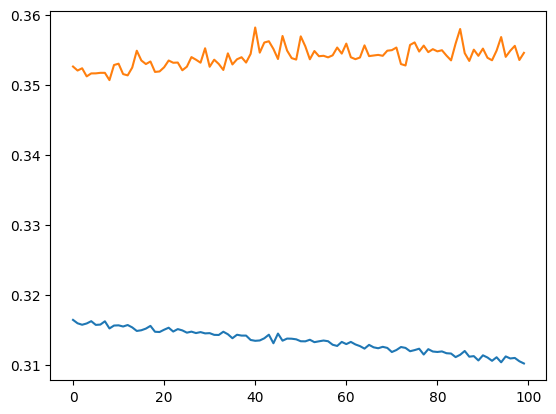

In [83]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

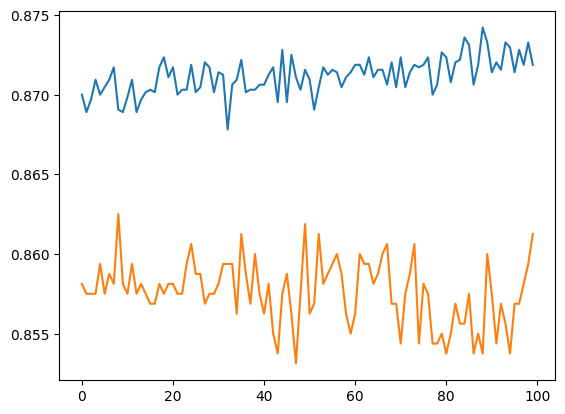

In [85]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])